The following data is acquired from https://data.tpdc.ac.cn/en/data/0fbc30a8-6065-4be3-b98b-95ae7f15a69e/

- The datasets from 2016 - 2020 is considered for the analysis. 2020 - 2021 is not considered for the analysis since it contains missing data for nearly 3 months (2020-02 : 2020-05).
- From 2016 - 2019 is considered for calibration and 2019 - 2020 is considered for validation.
- This is considered only for the Case 1 (with sub_temp_0.0cm) and Case 5 (with SEB)
- Note: We need snow depth dataset for later years! (Not just 2017)

Steps taken for the analysis:
1. Missing data is identified
2. The missing data is imputed with datasets from the previous year
3. Stored as .h5 file

Further details are provided in the excel sheet - Available_data - 

- Final_data_excelsheet/AWS_Yakou_ITP_Data_2015,16,17,18,19,20 (Sheet name)

- Begin with the 2019 dataset as the initial conditions for the model.  

The excel sheet contains the following parameters:

1. Wind speed at 10 m
2. Wind direction at 10 m
3. Air temperature at 5 m 
4. Relative humidity at 5 m 
5. Precipitation at 10 m
6. Air pressure 
7. Infrared temperature 
8. Incoming shortwave radiation
9. Outgoing shortwave radiation
10. Incoming longwave radiation
11. Outgoing longwave radiation
12. Net radiation
13. Soil heat flux at - 0.06 m
14. Soil moisture at - 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m
15. Soil temperature - 0.00 m, 0.04 m, 0.1 m, 0.2 m, 0.4 m, 0.8 m, 1.2 m, 1.6 m

**The following notebook is an attempt to write the code concisely to extract all the datasets**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec
import h5py
import os

In [2]:
sns.set()

In [3]:
print(os.getcwd())

/home/rk/ats_rk/testing/ats-demos/rk_model/Data/Data_Yakou/Yakou_met_data_ITP_rk


In [4]:
pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',100)

### 1. Reading the data

In [5]:
### Reading the data
df_AWS_2015 = pd.read_excel('Final_data_excelsheet/AWS_Yakou_ITP_Data_2015.xlsx',index_col=0,parse_dates=True)  
df_AWS_2016 = pd.read_excel('Final_data_excelsheet/AWS_Yakou_ITP_Data_2016.xlsx',index_col=0,parse_dates=True)
df_AWS_2017 = pd.read_excel('Final_data_excelsheet/AWS_Yakou_ITP_Data_2017.xlsx',index_col=0,parse_dates=True)
df_AWS_2018 = pd.read_excel('Final_data_excelsheet/AWS_Yakou_ITP_Data_2018.xlsx',index_col=0,parse_dates=True)
df_AWS_2019 = pd.read_excel('Final_data_excelsheet/AWS_Yakou_ITP_Data_2019.xlsx',index_col=0,parse_dates=True)
df_AWS_2020 = pd.read_excel('Final_data_excelsheet/AWS_Yakou_ITP_Data_2020.xlsx',index_col=0,parse_dates=True)

In [6]:
### Merging the data - https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
# Combining the dataset into a single dataframe
frames = [df_AWS_2015, df_AWS_2016, df_AWS_2017, df_AWS_2018, df_AWS_2019, df_AWS_2020]
df_AWS = pd.concat(frames)
df_AWS.head()

,WS_10m,WD_10m,Ta_5m,RH_5m,Rain,Press,IRT_1,IRT_2,PAR_down,PAR_up,DR,UR,DLR_Cor,ULR_Cor,Rn,Gs_1,Gs_2,Gs_3,Ms_4cm,Ms_10cm,Ms_20cm,Ms_40cm,Ms_80cm,Ms_120cm,Ms_160cm,Ts_0cm,Ts_4cm,Ts_10cm,Ts_20cm,Ts_40cm,Ts_80cm,Ts_120cm,Ts_160cm
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-09-18 12:40:00,4.114,195.0,1.872,79.55,0.0,619.5,10.720,10.510,136.60,15.390,761.7,122.90,257.7,385.9,510.7,1.851,27.56,41.13,40.85,37.72,39.97,37.92,15.63,11.89,23.02,11.170,3.927,2.504,2.547,3.001,1.803,0.402,0.075
2015-09-18 12:50:00,4.746,186.5,1.740,79.02,0.0,619.6,8.170,8.240,69.70,7.617,376.6,52.88,267.1,383.3,207.5,3.026,31.32,45.79,40.87,37.72,39.98,37.91,15.63,11.89,23.02,9.870,4.167,2.582,2.559,2.993,1.804,0.402,0.075
2015-09-18 13:00:00,5.071,198.9,1.463,80.40,0.0,619.6,6.084,5.969,49.68,5.490,249.2,32.05,300.3,377.3,140.2,4.481,34.92,49.90,40.86,37.73,39.97,37.91,15.64,11.89,23.04,7.719,4.416,2.675,2.574,2.983,1.802,0.405,0.074
2015-09-18 13:10:00,5.515,204.3,1.165,80.20,0.0,619.5,5.530,5.373,53.82,5.889,273.2,32.05,277.8,374.0,145.0,6.054,35.88,49.80,40.87,37.72,39.98,37.90,15.64,11.90,23.06,7.007,4.564,2.775,2.590,2.972,1.801,0.405,0.078
2015-09-18 13:20:00,5.155,200.4,0.973,83.60,0.0,619.4,5.312,5.153,50.15,5.453,234.0,32.05,306.3,372.8,135.4,7.647,34.43,46.08,40.87,37.72,39.97,37.90,15.64,11.90,23.07,6.489,4.618,2.880,2.610,2.965,1.799,0.405,0.080


In [7]:
### Details about the AWS met data
df_AWS_details = pd.read_excel('../Available_data.xlsx', sheet_name='AWS_Yakou_ITP_Data_2019_extract',index_col=0,parse_dates=True)  
df_AWS_details.head()

,Parameter,Product Name & Direction,Variable name,Depth/Height [m],Time steps [mins],Time interval,Units,Comments
Sl.No.,,,,,,,,
1,Wind speed at 10 m (m/s),"010C/020C; 10 m, north",WS_10m,10.0,10,01.01.2019 00:00 - 31.12.2019 23:50,m/s,NaN
2,Wind direction at 10 m (°),"010C/020C; 10 m, north",WD_10m,10.0,10,01.01.2019 00:00 - 31.12.2019 23:50,°,Why is the data all red?
3,Air temperature at 5 m (°C),"HMP45C; 5 m, north",Ta_5m,5.0,10,01.01.2019 00:00 - 31.12.2019 23:50,°C,NaN
4,Relative humidity at 5 m (%),"HMP45C; 5 m, north",RH_5m,5.0,10,01.01.2019 00:00 - 31.12.2019 23:50,%,Is it relative? Says RH - Hence should be rela...
5,Precipitation at 10 m (mm),rain gauge (TE525M; 10 m),Rain,10.0,10,01.01.2019 00:00 - 31.12.2019 23:50,mm,Precipitation measurement at 10 m? Seems odd


In [8]:
### Renaming the columns - 
data_AWS = df_AWS.copy()
data_AWS.columns = df_AWS_details['Parameter'].values
data_AWS.columns

Index(['Wind speed at 10 m (m/s)', 'Wind direction at 10 m (°)',
       'Air temperature at 5 m (°C)', 'Relative humidity at 5 m (%)',
       'Precipitation at 10 m (mm)', 'Air pressure (hPa)',
       'Infrared temperature (°C)', 'Infrared temperature (°C)', 'PAR_down',
       'PAR_up', 'Incoming shortwave radiation (W/m^2)',
       'Outgoing shortwave radiation (W/m^2)',
       'Incoming longwave radiation (W/m^2)',
       'Outgoing longwave radiation (W/m^2)', 'Net radiation (W/m^2)',
       'Soil heat flux at - 0.06 m (W/m^2) - 1',
       'Soil heat flux at - 0.06 m (W/m^2) - 2',
       'Soil heat flux at - 0.06 m (W/m^2) - 3',
       'Soil moisture at - 0.04 m (%)', 'Soil moisture at - 0.1 m (%)',
       'Soil moisture at - 0.2 m (%)', 'Soil moisture at - 0.4 m (%)',
       'Soil moisture at - 0.8 m (%)', 'Soil moisture at - 1.2 m (%)',
       'Soil moisture at - 1.6 m (%)', 'Soil temperature at - 0.00 m (°C)',
       'Soil temperature at - 0.04 m (°C)', 'Soil temperature at - 0.1 

### 2. Dealing with NaN, Erroneous, and missing data

#### 2.a. Data has -6999 values for missing data - hence replacing -6999 with NaN values

In [9]:
data_AWS_syn = data_AWS.copy()
data_AWS_syn = data_AWS_syn.replace(-6999,None)

In [10]:
data_AWS_prep = data_AWS_syn.copy()

In [11]:
### Check for NaN values
data_AWS_syn.index[np.where(np.isnan(data_AWS_syn))[0]]

DatetimeIndex([       '2018-04-20 14:00:00',        '2018-04-20 14:10:00',
                      '2018-05-05 14:30:00', '2018-12-10 08:39:59.995000',
               '2018-12-10 09:19:59.995000', '2018-12-10 09:29:59.995000',
                      '2019-01-22 07:30:00',        '2019-01-30 17:30:00',
                      '2019-01-30 21:00:00',        '2019-01-31 00:40:00',
               ...
               '2020-12-31 16:09:59.980000', '2020-12-31 16:19:59.980000',
               '2020-12-31 16:29:59.980000', '2020-12-31 16:39:59.980000',
               '2020-12-31 16:49:59.980000', '2020-12-31 16:59:59.980000',
               '2020-12-31 17:09:59.980000', '2020-12-31 17:19:59.980000',
               '2020-12-31 17:29:59.980000', '2020-12-31 17:39:59.980000'],
              dtype='datetime64[ns]', name='TIMESTAMP', length=40078, freq=None)

**Comments**:
* Few NaN values are present (278132/9178356 = 3.03% ). Since the data is available every 10 mins, we have considered to resample the data.

### 3. Resampling the data to daily mean values

In [12]:
data_AWS_syn = data_AWS_syn.resample('D').mean()

# Precipitation - Daily summation of the values are determined instead of mean

data_AWS_prep_dailysum = data_AWS_prep['Precipitation at 10 m (mm)'].resample('D').sum()

## Working with first the input data 
- Wind speed at 10 m, Air temperature at 5 m, Relative humidity at 5 m, Precipitation at 10 m, Incoming shortwave radiation

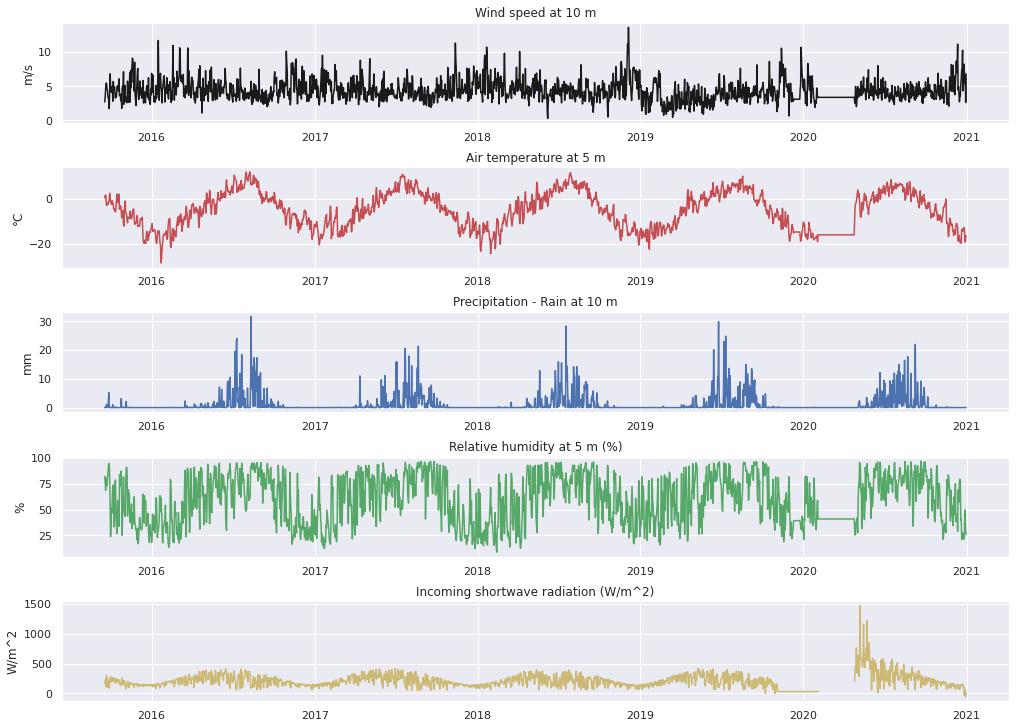

In [13]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=5, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])

f2_ax1.set_title('Wind speed at 10 m')
f2_ax1.plot(data_AWS_syn['Wind speed at 10 m (m/s)'],'k', label='Wind speed at 10 m (m/s)')
f2_ax1.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('Air temperature at 5 m')
f2_ax2.plot(data_AWS_syn['Air temperature at 5 m (°C)'], 'r',label='Air temperature at 5 m (°C)')
f2_ax2.set_ylabel('°C')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax2.grid(True)

f2_ax3.set_title('Precipitation - Rain at 10 m')
f2_ax3.plot(data_AWS_prep_dailysum, 'b',label='Precipitation at 10 m (mm)')
f2_ax3.set_ylabel('mm')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax3.grid(True)

f2_ax4.set_title('Relative humidity at 5 m (%)')
f2_ax4.plot(data_AWS_syn['Relative humidity at 5 m (%)'], 'g',label='Relative humidity at 5 m (%)')
f2_ax4.set_ylabel('%')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax4.grid(True)

f2_ax5.set_title('Incoming shortwave radiation (W/m^2)')
f2_ax5.plot(data_AWS_syn['Incoming shortwave radiation (W/m^2)'], 'y',label='Incoming shortwave radiation (W/m^2)')
f2_ax5.set_ylabel('W/m^2')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax5.grid(True)

**Comments:**
* The time period from '2019-12-12':'2019-12-24' and '2020-02':'2020-05' - Should be disregarded since the same values cannot occur at continous time periods
1. Wind speed at 10 m [m/s]
    * Wind speeds vary from 0 : 10.68 m/s with a mean of 3.793 m/s - That seems possible!
    * There is considerable variation - seems plausible.
    * Any chances of seasonality affects? - Westerlies during the winter and Indian Summer Monsoon during the summer.
2. Air temperature at 5 m [°C]
    * Varies from -22.37°C : 9.97°C with a mean of -5°C. - Very cold region!
    * The air temperature increases during the summer and decreases during the winter - Good!
    * Seasonality effects are clearly seen - Good! - Can probably be modelled!
3. Precipitation at 10 m [mm]
    * Variations are quite low! - Varies from 0 : 0.2 mm with a mean of 0.009 mm 
    * The precipitation mainly occurs during the indian summer monsoon period - from June : October
    * There might be more snow than rain
4. Relative humidity at 5 m [%]
    * Varies from 15%: 96% with a mean of 61% - Quite humid most of the time.
    * During precipitation - you see the RH increases - That's good!
    * I was also expecting that the relative humidity decreases with increase in air temperature - Not the case!
5. Incoming shortwave radiation (W/m2)
    * Incoming shortwave radiation: Constant and missing values from 2019-11 : 2020-05. They also have very high unplausible values from 2020-05 onwards.

###  Erroneous data:
* Found two time periods where some the parameters are constant - not possible!
 - (a) '2019-12-12':'2019-12-24'
 - (b) '2020-02':'2020-05'
 - (c) '2019-12-12':'2020-02-05' - For only shortwave radiation
 
* If we are considering to use this dataset, We need to find efficient ways of dealing with erroneous data. To my knowledge, we can consider:
    - (a) Replacing the values with previous year data (Quick-fix)
    - (b) Modelling the datasets using data-driven techniques (Winter-Holt's method, ARIMA, SARIMA, ...etc.)
    - Method (a) is followed! - Or does Dr. Mudelsee have a better idea?

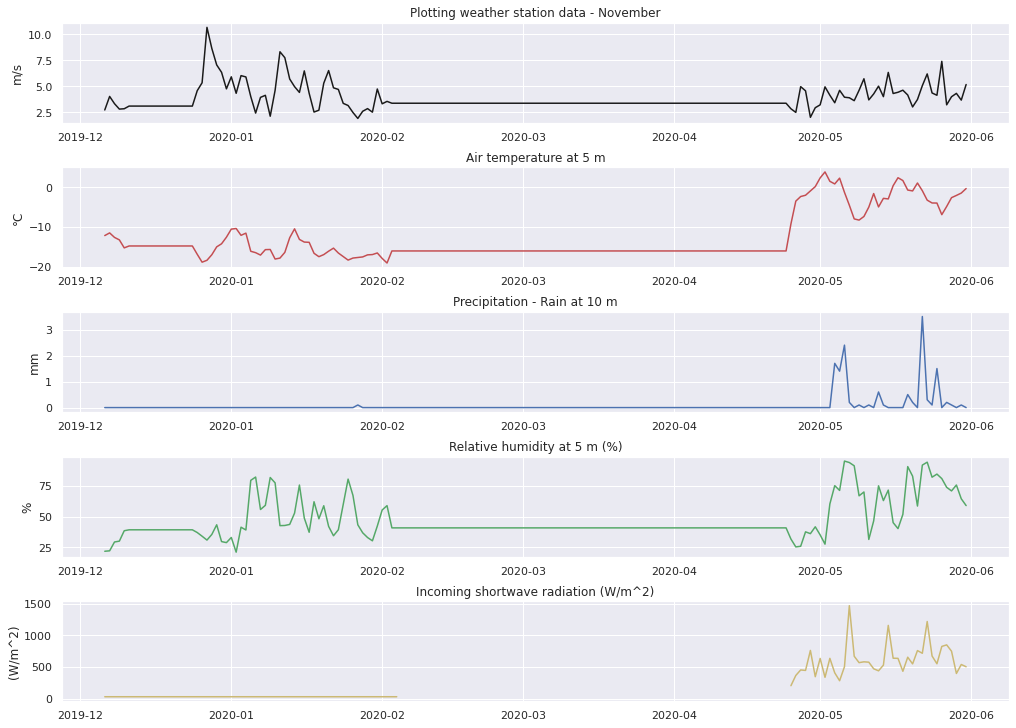

In [14]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=5, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])

data_AWS_syn_plot = data_AWS_syn['2019-12-06':'2020-05']

f2_ax1.set_title('Plotting weather station data - November')
f2_ax1.plot(data_AWS_syn_plot['Wind speed at 10 m (m/s)'],'k', label='Wind speed at 10 m (m/s)')
f2_ax1.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('Air temperature at 5 m')
f2_ax2.plot(data_AWS_syn_plot['Air temperature at 5 m (°C)'], 'r',label='Air temperature at 5 m (°C)')
f2_ax2.set_ylabel('°C')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax2.grid(True)

f2_ax3.set_title('Precipitation - Rain at 10 m')
f2_ax3.plot(data_AWS_prep_dailysum['2019-12-06':'2020-05'], 'b',label='Precipitation at 10 m (mm)')
f2_ax3.set_ylabel('mm')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax3.grid(True)

f2_ax4.set_title('Relative humidity at 5 m (%)')
f2_ax4.plot(data_AWS_syn_plot['Relative humidity at 5 m (%)'], 'g',label='Relative humidity at 5 m (%)')
f2_ax4.set_ylabel('%')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax4.grid(True)

f2_ax5.set_title('Incoming shortwave radiation (W/m^2)')
f2_ax5.plot(data_AWS_syn_plot['Incoming shortwave radiation (W/m^2)'], 'y',label='Incoming shortwave radiation (W/m^2)')
f2_ax5.set_ylabel('(W/m^2)')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax5.grid(True)

* Comments:
    - Air temperature at 5 m, Precipitation (rain) at 10 m, and relative humidity all look plausible.
    - Wind speed has erroneous (constant) data close to the end of the year 2020!
    - Incoming shortwave radiation has a constant value from around 2019-11 : 2019-12-31

Take a closer look for missing values and erroneous data!

### Considering the 2016 - 2019 input dataset 
- The input data required for the model are: 
1. incoming shortwave radiation [W m^-2]
2. air temperature [K]
3. relative humidity [-] [To vary from 0 - 1]
4. wind speed [m s^-1]
5. precipitation rain [m s^-1] - precipitation rain is required in [m s^-1]? We have mm/day - Check the outputs of thier dataset!
6. precipitation snow [m SWE s^-1]

In [15]:
### Changing relative humidity from 0 - 1 : Value/100

data_AWS_syn['Relative humidity at 5 m (%)'] = data_AWS_syn['Relative humidity at 5 m (%)']/100

In [16]:
# Taking the data only from 2016 - 2019
data_AWS_syn_input = data_AWS_syn['2016':'2019'][['Incoming shortwave radiation (W/m^2)','Incoming longwave radiation (W/m^2)','Air temperature at 5 m (°C)','Relative humidity at 5 m (%)','Wind speed at 10 m (m/s)','Soil temperature at - 0.00 m (°C)']]
data_AWS_syn_input['Precipitation-daily_sum (mm)'] = data_AWS_prep_dailysum['2016':'2019']

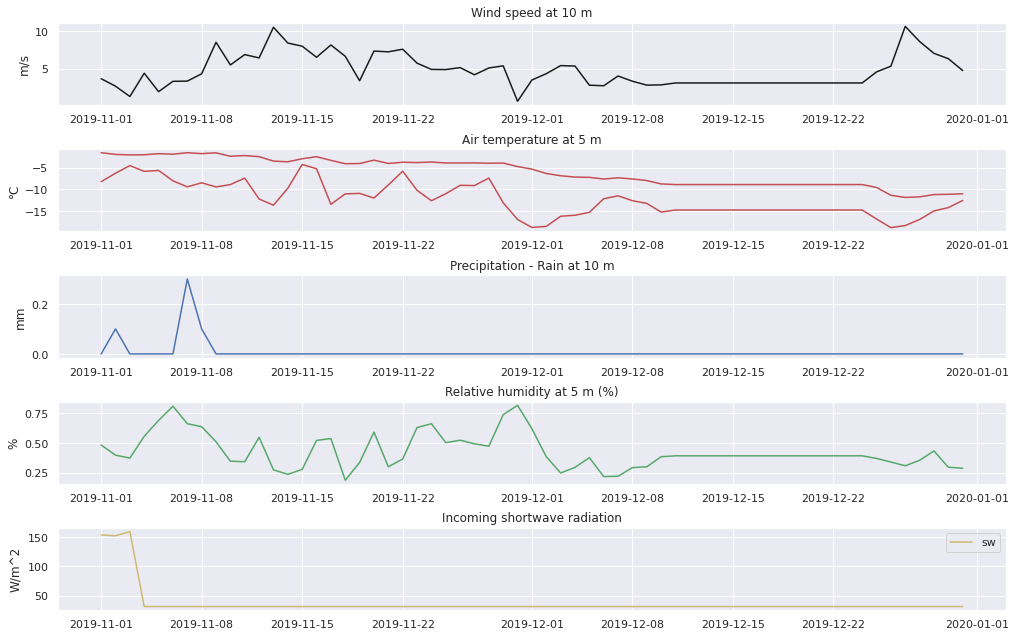

In [17]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
#f2_ax6 = fig2.add_subplot(spec2[5, 0])

data_plot = data_AWS_syn_input['2019-11':'2019-12']

f2_ax1.set_title('Wind speed at 10 m')
f2_ax1.plot(data_plot['Wind speed at 10 m (m/s)'],'k', label='Wind speed at 10 m (m/s)')
f2_ax1.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('Air temperature at 5 m')
f2_ax2.plot(data_plot['Air temperature at 5 m (°C)'], 'r',label='Air temperature at 5 m (°C)')
f2_ax2.plot(data_plot['Soil temperature at - 0.00 m (°C)'], 'r',label='Soil temperature at - 0.00 m (°C)')
f2_ax2.set_ylabel('°C')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax2.grid(True)

f2_ax3.set_title('Precipitation - Rain at 10 m')
f2_ax3.plot(data_plot['Precipitation-daily_sum (mm)'], 'b',label='Precipitation at 10 m (mm)')
f2_ax3.set_ylabel('mm')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax3.grid(True)

f2_ax4.set_title('Relative humidity at 5 m (%)')
f2_ax4.plot(data_plot['Relative humidity at 5 m (%)'], 'g',label='Relative humidity at 5 m (%)')
f2_ax4.set_ylabel('%')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax4.grid(True)

f2_ax5.set_title('Incoming shortwave radiation')
#f2_ax5.plot(data_AWS_syn_input['Incoming longwave radiation (W/m^2)'], 'k',label='lw')
f2_ax5.plot(data_plot['Incoming shortwave radiation (W/m^2)'], 'y',label='sw')
f2_ax5.set_ylabel('W/m^2')
#f2_ax1.set_xlabel('Date')
f2_ax5.legend()
f2_ax5.grid(True)

#f2_ax6.set_title('Snow depth (in m)')
#f2_ax6.plot(data_AWS_syn_input['Snow depth (in m)'], 'k',label='Snow depth (in m)')
#f2_ax6.set_ylabel('in m')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()

#### Comments:
* Found two time periods where the parameters are constant - not possible!
 - (a) '2019-12-12':'2019-12-24' - For wind speed at 10 m, air temperature at 5 m, relative humidity at 5 m
 - (b) '2019-11':'2020-01' - For incoming shortwave radiation 
 - Dealing with the erroneous (constant) data by replacing it with data from one year earlier

##### How does the data from 2018 look like?

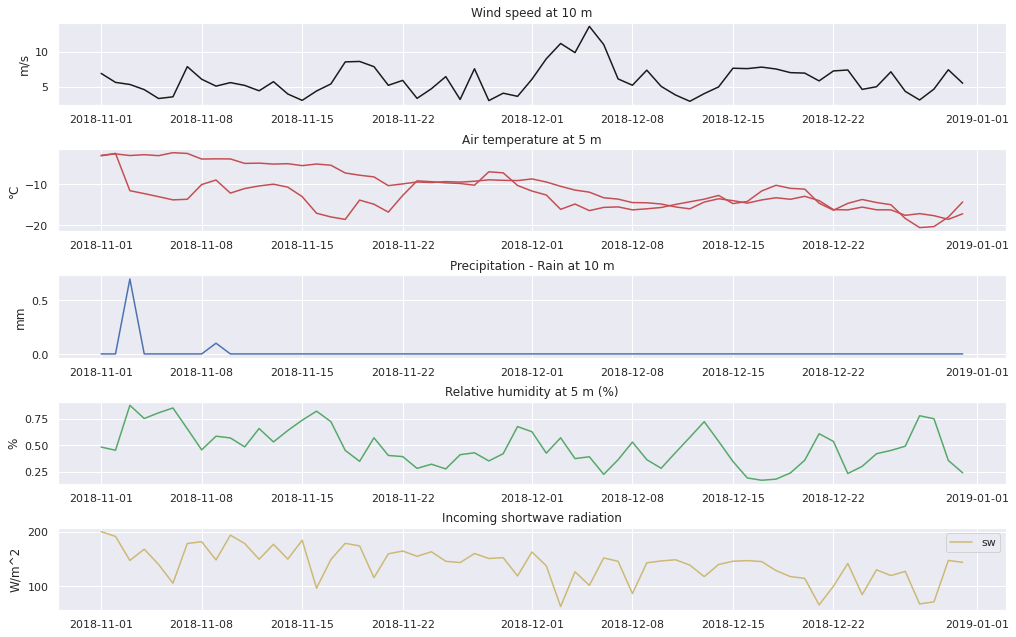

In [18]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
#f2_ax6 = fig2.add_subplot(spec2[5, 0])

data_plot = data_AWS_syn_input['2018-11':'2018-12']

f2_ax1.set_title('Wind speed at 10 m')
f2_ax1.plot(data_plot['Wind speed at 10 m (m/s)'],'k', label='Wind speed at 10 m (m/s)')
f2_ax1.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('Air temperature at 5 m')
f2_ax2.plot(data_plot['Air temperature at 5 m (°C)'], 'r',label='Air temperature at 5 m (°C)')
f2_ax2.plot(data_plot['Soil temperature at - 0.00 m (°C)'], 'r',label='Soil temperature at - 0.00 m (°C)')


f2_ax2.set_ylabel('°C')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax2.grid(True)

f2_ax3.set_title('Precipitation - Rain at 10 m')
f2_ax3.plot(data_plot['Precipitation-daily_sum (mm)'], 'b',label='Precipitation at 10 m (mm)')
f2_ax3.set_ylabel('mm')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax3.grid(True)

f2_ax4.set_title('Relative humidity at 5 m (%)')
f2_ax4.plot(data_plot['Relative humidity at 5 m (%)'], 'g',label='Relative humidity at 5 m (%)')
f2_ax4.set_ylabel('%')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax4.grid(True)

f2_ax5.set_title('Incoming shortwave radiation')
#f2_ax5.plot(data_AWS_syn_input['Incoming longwave radiation (W/m^2)'], 'k',label='lw')
f2_ax5.plot(data_plot['Incoming shortwave radiation (W/m^2)'], 'y',label='sw')
f2_ax5.set_ylabel('W/m^2')
#f2_ax1.set_xlabel('Date')
f2_ax5.legend()
f2_ax5.grid(True)

#f2_ax6.set_title('Snow depth (in m)')
#f2_ax6.plot(data_AWS_syn_input['Snow depth (in m)'], 'k',label='Snow depth (in m)')
#f2_ax6.set_ylabel('in m')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()

#### Plausible values are observed and can be considered to be replaced with erroneous data of 2019
- wind speed at 10 m, subsurface temperature at 0.0 cm, air temperature at 5 m, relative humidity at 5 m : The dataset is replaced from 12-12 : 12-24
- incoming shortwave radiation is replaced from 11-03 : 12-31

In [19]:
# Storing the imputed data in a seperate dataframe
data_AWS_input_imputed = data_AWS_syn_input.copy()

# Wind speed at 10 m (m/s)
data_AWS_input_imputed['Wind speed at 10 m (m/s)']['2019-12-12':'2019-12-24'] = data_AWS_input_imputed['Wind speed at 10 m (m/s)']['2018-12-12':'2018-12-24']

# Subsurface temperature at 0.0 cm
data_AWS_input_imputed['Soil temperature at - 0.00 m (°C)']['2019-12-12':'2019-12-24'] = data_AWS_input_imputed['Soil temperature at - 0.00 m (°C)']['2018-12-12':'2018-12-24']

# Air temperature at 5 m
data_AWS_input_imputed['Air temperature at 5 m (°C)']['2019-12-12':'2019-12-24'] = data_AWS_input_imputed['Air temperature at 5 m (°C)']['2018-12-12':'2018-12-24']

# Relative humidity at 5 m
data_AWS_input_imputed['Relative humidity at 5 m (%)']['2019-12-12':'2019-12-24'] = data_AWS_input_imputed['Relative humidity at 5 m (%)']['2018-12-12':'2018-12-24']

# Shortwave radiation
data_AWS_input_imputed['Incoming shortwave radiation (W/m^2)']['2019-11-02':'2019-12-31'] = data_AWS_input_imputed['Incoming shortwave radiation (W/m^2)']['2018-11-02':'2018-12-31']

#data_AWS_input_imputed[['Wind speed at 10 m (m/s)','Air temperature at 5 m (°C)','Relative humidity at 5 m (%)']]['2019-12-12':'2019-12-24'] = data_AWS_input_imputed[['Wind speed at 10 m (m/s)','Air temperature at 5 m (°C)','Relative humidity at 5 m (%)']]['2018-12-12':'2018-12-24'] 

### Data after imputing with the year 2018

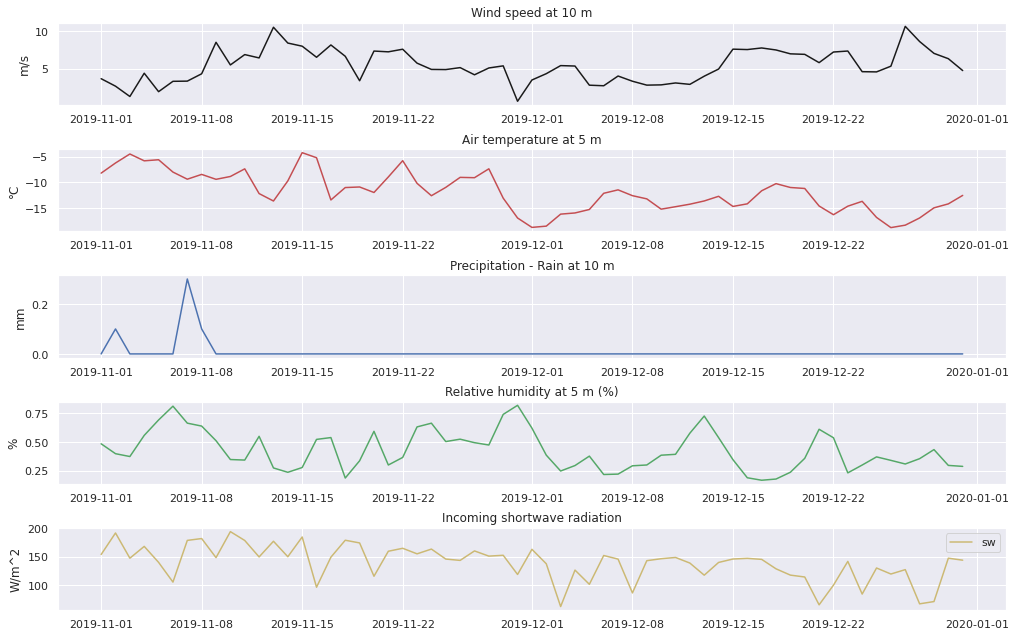

In [20]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
#f2_ax6 = fig2.add_subplot(spec2[5, 0])

data_plot = data_AWS_input_imputed['2019-11':'2019-12']

f2_ax1.set_title('Wind speed at 10 m')
f2_ax1.plot(data_plot['Wind speed at 10 m (m/s)'],'k', label='Wind speed at 10 m (m/s)')
f2_ax1.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('Air temperature at 5 m')
f2_ax2.plot(data_plot['Air temperature at 5 m (°C)'], 'r',label='Air temperature at 5 m (°C)')
f2_ax2.set_ylabel('°C')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax2.grid(True)

f2_ax3.set_title('Precipitation - Rain at 10 m')
f2_ax3.plot(data_plot['Precipitation-daily_sum (mm)'], 'b',label='Precipitation at 10 m (mm)')
f2_ax3.set_ylabel('mm')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax3.grid(True)

f2_ax4.set_title('Relative humidity at 5 m (%)')
f2_ax4.plot(data_plot['Relative humidity at 5 m (%)'], 'g',label='Relative humidity at 5 m (%)')
f2_ax4.set_ylabel('%')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax4.grid(True)

f2_ax5.set_title('Incoming shortwave radiation')
#f2_ax5.plot(data_AWS_syn_input['Incoming longwave radiation (W/m^2)'], 'k',label='lw')
f2_ax5.plot(data_plot['Incoming shortwave radiation (W/m^2)'], 'y',label='sw')
f2_ax5.set_ylabel('W/m^2')
#f2_ax1.set_xlabel('Date')
f2_ax5.legend()
f2_ax5.grid(True)

#f2_ax6.set_title('Snow depth (in m)')
#f2_ax6.plot(data_AWS_syn_input['Snow depth (in m)'], 'k',label='Snow depth (in m)')
#f2_ax6.set_ylabel('in m')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()

### Looks good!

### Missing data

In [21]:
data_AWS_input_imputed.index[np.where(np.isnan(data_AWS_input_imputed))[0]], len(data_AWS_input_imputed.index[np.where(np.isnan(data_AWS_input_imputed))[0]])

(DatetimeIndex(['2019-10-09', '2019-10-10'], dtype='datetime64[ns]', name='TIMESTAMP', freq=None),
 2)

- Only two missing values are found! - Where are they?

In [22]:
data_AWS_input_imputed['2019-10-09':'2019-10-10']

,Incoming shortwave radiation (W/m^2),Incoming longwave radiation (W/m^2),Air temperature at 5 m (°C),Relative humidity at 5 m (%),Wind speed at 10 m (m/s),Soil temperature at - 0.00 m (°C),Precipitation-daily_sum (mm)
TIMESTAMP,,,,,,,
2019-10-09,108.058007,294.720139,-4.711500,0.942340,NaN,-0.329493,0.1
2019-10-10,158.793778,258.058333,-5.464847,0.932264,NaN,-0.467486,0.0


- Wind speed at 10 m (m/s) has the two missing values - replacing the missing values with previous year!

In [23]:
data_AWS_input_imputed['Wind speed at 10 m (m/s)']['2019-10-09'] = data_AWS_input_imputed['Wind speed at 10 m (m/s)']['2018-10-09']

data_AWS_input_imputed['Wind speed at 10 m (m/s)']['2019-10-10'] = data_AWS_input_imputed['Wind speed at 10 m (m/s)']['2018-10-10']

In [24]:
# Check once more for null values
data_AWS_input_imputed.index[np.where(np.isnan(data_AWS_input_imputed))[0]], len(data_AWS_input_imputed.index[np.where(np.isnan(data_AWS_input_imputed))[0]])

(DatetimeIndex([], dtype='datetime64[ns]', name='TIMESTAMP', freq=None), 0)

In [25]:
data_AWS_input_final = data_AWS_input_imputed.copy()
data_AWS_input_final.head()

,Incoming shortwave radiation (W/m^2),Incoming longwave radiation (W/m^2),Air temperature at 5 m (°C),Relative humidity at 5 m (%),Wind speed at 10 m (m/s),Soil temperature at - 0.00 m (°C),Precipitation-daily_sum (mm)
TIMESTAMP,,,,,,,
2016-01-01,147.702618,143.619444,-11.888438,0.181419,6.880639,-13.103958,0.0
2016-01-02,140.529160,174.365278,-11.031660,0.243579,5.634090,-12.255417,0.0
2016-01-03,135.256493,172.479861,-13.446111,0.456374,4.129521,-12.737500,0.0
2016-01-04,107.868264,174.425694,-14.566944,0.434167,6.604604,-13.006597,0.0
2016-01-05,148.488174,150.390972,-14.099236,0.298974,4.566090,-13.525278,0.0


### Unit conversion
1. incoming shortwave radiation [W m^-2] - remains the same.
2. air temperature and subsurface temperature [K] - From °C --> K [+273.15]
3. relative humidity [-] - remains the same
4. wind speed [m s^-1] - remains the same
5. precipitation rain [m s^-1] - From mm/day --> m/s [/(10^3 * 86400) (or) * 1.1574 X 10^{-8}]
6. precipitation snow [m SWE s^-1] - From m/day --> m/s [/86400]

In [26]:
data_AWS_input_final.columns

Index(['Incoming shortwave radiation (W/m^2)',
       'Incoming longwave radiation (W/m^2)', 'Air temperature at 5 m (°C)',
       'Relative humidity at 5 m (%)', 'Wind speed at 10 m (m/s)',
       'Soil temperature at - 0.00 m (°C)', 'Precipitation-daily_sum (mm)'],
      dtype='object')

In [27]:
#data_AWS_input_final = data_AWS_input_2017.copy()

data_AWS_input_final['Soil temperature at - 0.00 m [K]'] = data_AWS_input_final['Soil temperature at - 0.00 m (°C)'] + 273.15
data_AWS_input_final['air temperature [K]'] = data_AWS_input_final['Air temperature at 5 m (°C)'] + 273.15
data_AWS_input_final['precipitation rain [m s^-1]'] = data_AWS_input_final['Precipitation-daily_sum (mm)']/(1000*86400)

data_AWS_input_final.head()

,Incoming shortwave radiation (W/m^2),Incoming longwave radiation (W/m^2),Air temperature at 5 m (°C),Relative humidity at 5 m (%),Wind speed at 10 m (m/s),Soil temperature at - 0.00 m (°C),Precipitation-daily_sum (mm),Soil temperature at - 0.00 m [K],air temperature [K],precipitation rain [m s^-1]
TIMESTAMP,,,,,,,,,,
2016-01-01,147.702618,143.619444,-11.888438,0.181419,6.880639,-13.103958,0.0,260.046042,261.261562,0.0
2016-01-02,140.529160,174.365278,-11.031660,0.243579,5.634090,-12.255417,0.0,260.894583,262.118340,0.0
2016-01-03,135.256493,172.479861,-13.446111,0.456374,4.129521,-12.737500,0.0,260.412500,259.703889,0.0
2016-01-04,107.868264,174.425694,-14.566944,0.434167,6.604604,-13.006597,0.0,260.143403,258.583056,0.0
2016-01-05,148.488174,150.390972,-14.099236,0.298974,4.566090,-13.525278,0.0,259.624722,259.050764,0.0


### Final plot that will serve as input into the model:

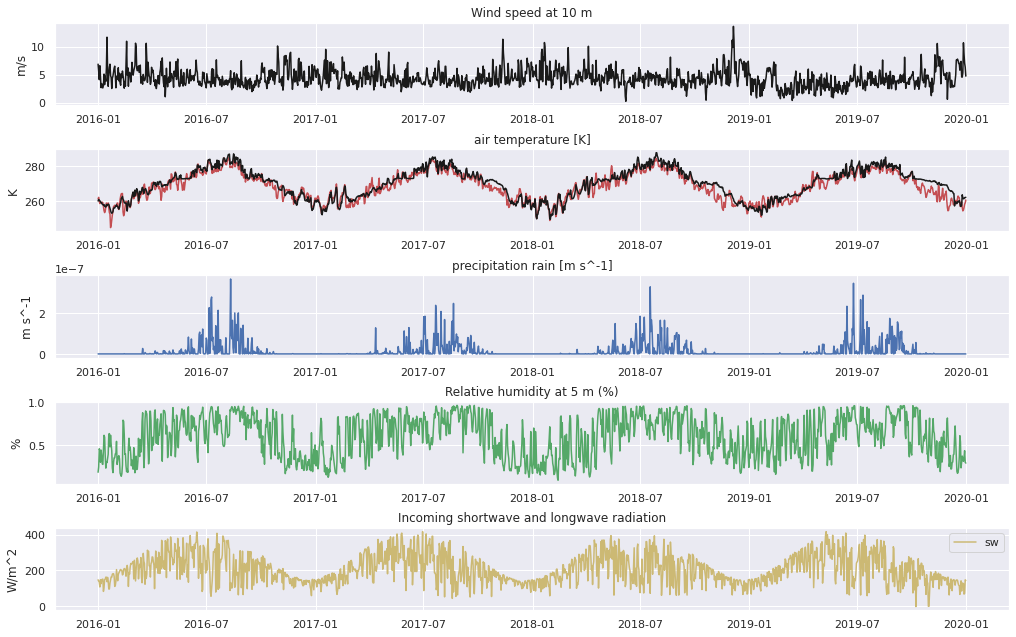

In [28]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
#f2_ax6 = fig2.add_subplot(spec2[5, 0])

f2_ax1.set_title('Wind speed at 10 m')
f2_ax1.plot(data_AWS_input_final['Wind speed at 10 m (m/s)'],'k', label='Wind speed at 10 m (m/s)')
f2_ax1.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('air temperature [K]')
f2_ax2.plot(data_AWS_input_final['air temperature [K]'], 'r',label='air temperature [K]')
f2_ax2.plot(data_AWS_input_final['Soil temperature at - 0.00 m [K]'], 'k',label='Soil temperature at - 0.00 m [K]')
f2_ax2.set_ylabel('K')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax2.grid(True)

f2_ax3.set_title('precipitation rain [m s^-1]')
f2_ax3.plot(data_AWS_input_final['precipitation rain [m s^-1]'], 'b',label='precipitation rain [m s^-1]')
f2_ax3.set_ylabel('m s^-1')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax3.grid(True)

f2_ax4.set_title('Relative humidity at 5 m (%)')
f2_ax4.plot(data_AWS_input_final['Relative humidity at 5 m (%)'], 'g',label='Relative humidity at 5 m (%)')
f2_ax4.set_ylabel('%')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax4.grid(True)

f2_ax5.set_title('Incoming shortwave and longwave radiation')
#f2_ax5.plot(data_AWS_input_final['Incoming longwave radiation (W/m^2)'], 'k',label='lw')
f2_ax5.plot(data_AWS_input_final['Incoming shortwave radiation (W/m^2)'], 'y',label='sw')
f2_ax5.set_ylabel('W/m^2')
#f2_ax1.set_xlabel('Date')
f2_ax5.legend()
f2_ax5.grid(True)


In [29]:
data_AWS_input_final = data_AWS_input_final[['air temperature [K]','Soil temperature at - 0.00 m [K]','Wind speed at 10 m (m/s)','precipitation rain [m s^-1]','Relative humidity at 5 m (%)','Incoming shortwave radiation (W/m^2)']]
data_AWS_input_final.head()

,air temperature [K],Soil temperature at - 0.00 m [K],Wind speed at 10 m (m/s),precipitation rain [m s^-1],Relative humidity at 5 m (%),Incoming shortwave radiation (W/m^2)
TIMESTAMP,,,,,,
2016-01-01,261.261562,260.046042,6.880639,0.0,0.181419,147.702618
2016-01-02,262.118340,260.894583,5.634090,0.0,0.243579,140.529160
2016-01-03,259.703889,260.412500,4.129521,0.0,0.456374,135.256493
2016-01-04,258.583056,260.143403,6.604604,0.0,0.434167,107.868264
2016-01-05,259.050764,259.624722,4.566090,0.0,0.298974,148.488174


### Calibration dataset - 2016 - 2018

In [30]:
# Storing the data in a seperate dataframe
data_AWS_input_calib = data_AWS_input_final['2016':'2018']

In [31]:
# Opening the input file
hf_input = h5py.File('Final_InputData_4yrs/Calib_data_2016_2018.h5','w')

In [32]:
len(data_AWS_input_calib)

1096

In [33]:
# Creating a variable with time instances for 1096 days
no_days = len(data_AWS_input_calib) # Total number of days
no_secs_day = 86400 # Total number of seconds in a day
times = np.arange(0,no_days*no_secs_day,no_secs_day)
len(times)

1096

In [34]:
data_AWS_input_calib.columns

Index(['air temperature [K]', 'Soil temperature at - 0.00 m [K]',
       'Wind speed at 10 m (m/s)', 'precipitation rain [m s^-1]',
       'Relative humidity at 5 m (%)', 'Incoming shortwave radiation (W/m^2)'],
      dtype='object')

In [35]:
# Changing the storage to numpy array
hf_input.create_dataset('time [s]', data=times)
hf_input.create_dataset('Soil temperature at - 0.00 m [K]', data=data_AWS_input_calib['Soil temperature at - 0.00 m [K]'].values)
hf_input.create_dataset('air temperature [K]', data=data_AWS_input_calib['air temperature [K]'].values)
hf_input.create_dataset('Wind speed at 10 m (m/s)', data=data_AWS_input_calib['Wind speed at 10 m (m/s)'].values)
hf_input.create_dataset('precipitation rain [m s^-1]', data=data_AWS_input_calib['precipitation rain [m s^-1]'].values)
hf_input.create_dataset('Relative humidity at 5 m (%)', data=data_AWS_input_calib['Relative humidity at 5 m (%)'].values)
hf_input.create_dataset('Incoming shortwave radiation (W/m^2)', data=data_AWS_input_calib['Incoming shortwave radiation (W/m^2)'].values)

<HDF5 dataset "m^2)": shape (1096,), type "<f8">

In [36]:
hf_input.close()

In [37]:
### Reading the file once more to check
### Extracting the data from the example 'column_data.h5'.  
with h5py.File(f'Final_InputData_4yrs/Calib_data_2016_2018.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    print(np.array(hdf.get('air temperature [K]')))
    print(len(np.array(hdf.get('air temperature [K]'))))

    #temperature_column = np.array(hdf.get('temperature.cell.0/1600'))

List of datasets in this file: 
 
 ['Incoming shortwave radiation (W', 'Relative humidity at 5 m (%)', 'Soil temperature at - 0.00 m [K]', 'Wind speed at 10 m (m', 'air temperature [K]', 'precipitation rain [m s^-1]', 'time [s]']


[261.2615625  262.11834028 259.70388889 ... 252.8775     255.18458333
 258.84167832]
1096


### Validation dataset - 2019

In [38]:
# Storing the data in a seperate dataframe
data_AWS_input_valid = data_AWS_input_final.loc['2019']

In [39]:
# Opening the input file
hf_input = h5py.File('Final_InputData_4yrs/Validation_data_2019.h5','w')

In [40]:
len(data_AWS_input_valid)

365

In [41]:
# Creating a variable with time instances for 1096 days
no_days = len(data_AWS_input_valid) # Total number of days
no_secs_day = 86400 # Total number of seconds in a day
times = np.arange(0,no_days*no_secs_day,no_secs_day)
len(times)

365

In [42]:
data_AWS_input_valid.columns

Index(['air temperature [K]', 'Soil temperature at - 0.00 m [K]',
       'Wind speed at 10 m (m/s)', 'precipitation rain [m s^-1]',
       'Relative humidity at 5 m (%)', 'Incoming shortwave radiation (W/m^2)'],
      dtype='object')

In [43]:
# Changing the storage to numpy array
hf_input.create_dataset('time [s]', data=times)
hf_input.create_dataset('Soil temperature at - 0.00 m [K]', data=data_AWS_input_valid['Soil temperature at - 0.00 m [K]'].values)
hf_input.create_dataset('air temperature [K]', data=data_AWS_input_valid['air temperature [K]'].values)
hf_input.create_dataset('Wind speed at 10 m (m/s)', data=data_AWS_input_valid['Wind speed at 10 m (m/s)'].values)
hf_input.create_dataset('precipitation rain [m s^-1]', data=data_AWS_input_valid['precipitation rain [m s^-1]'].values)
hf_input.create_dataset('Relative humidity at 5 m (%)', data=data_AWS_input_valid['Relative humidity at 5 m (%)'].values)
hf_input.create_dataset('Incoming shortwave radiation (W/m^2)', data=data_AWS_input_valid['Incoming shortwave radiation (W/m^2)'].values)

<HDF5 dataset "m^2)": shape (365,), type "<f8">

In [44]:
hf_input.close()

In [45]:
### Reading the file once more to check
### Extracting the data from the example 'column_data.h5'.  
with h5py.File(f'Final_InputData_4yrs/Validation_data_2019.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    print(np.array(hdf.get('air temperature [K]')))
    print(len(np.array(hdf.get('air temperature [K]'))))

    #temperature_column = np.array(hdf.get('temperature.cell.0/1600'))

List of datasets in this file: 
 
 ['Incoming shortwave radiation (W', 'Relative humidity at 5 m (%)', 'Soil temperature at - 0.00 m [K]', 'Wind speed at 10 m (m', 'air temperature [K]', 'precipitation rain [m s^-1]', 'time [s]']


[259.22333333 260.01297222 257.97833333 255.56465278 256.00243056
 258.91375    256.566875   257.15354167 257.38604167 256.15451389
 256.67034722 258.34298611 259.45465278 255.61291667 254.09006944
 256.63305556 259.65291667 257.73777778 254.77541667 251.66826389
 250.77819444 259.33305556 261.746875   263.06275694 262.18743056
 260.84636806 257.45277778 258.23548611 256.51465278 255.20631944
 255.3375     262.17386111 261.90770833 255.81048611 255.83986111
 259.53041667 261.63397222 262.67614583 260.12625694 256.82006944
 256.7425     259.67375    261.49545833 262.77573611 261.52831944
 262.38975    260.41395833 256.61923611 257.328125   259.23079167
 260.82436806 260.34319444 261.51829167 260.05459722 258.36493056
 257.45541667 257.940625   259.24861111 26

## Preparing the output dataset (calibration and validation)

In [110]:
# Storing the parameter names
output_param_names = ['Soil moisture at - 0.04 m (%)','Soil moisture at - 0.1 m (%)','Soil moisture at - 0.2 m (%)','Soil moisture at - 0.4 m (%)','Soil moisture at - 0.8 m (%)','Soil moisture at - 1.2 m (%)','Soil moisture at - 1.6 m (%)','Soil temperature at - 0.00 m (°C)','Soil temperature at - 0.04 m (°C)','Soil temperature at - 0.1 m (°C)','Soil temperature at - 0.2 m (°C)','Soil temperature at - 0.4 m (°C)','Soil temperature at - 0.8 m (°C)','Soil temperature at - 1.2 m (°C)','Soil temperature at - 1.6 m (°C)']
output_param_names

['Soil moisture at - 0.04 m (%)',
 'Soil moisture at - 0.1 m (%)',
 'Soil moisture at - 0.2 m (%)',
 'Soil moisture at - 0.4 m (%)',
 'Soil moisture at - 0.8 m (%)',
 'Soil moisture at - 1.2 m (%)',
 'Soil moisture at - 1.6 m (%)',
 'Soil temperature at - 0.00 m (°C)',
 'Soil temperature at - 0.04 m (°C)',
 'Soil temperature at - 0.1 m (°C)',
 'Soil temperature at - 0.2 m (°C)',
 'Soil temperature at - 0.4 m (°C)',
 'Soil temperature at - 0.8 m (°C)',
 'Soil temperature at - 1.2 m (°C)',
 'Soil temperature at - 1.6 m (°C)']

In [111]:
data_AWS_output = data_AWS_syn['2016':'2019'][output_param_names].copy()

### Plotting soil moisture at different depths 

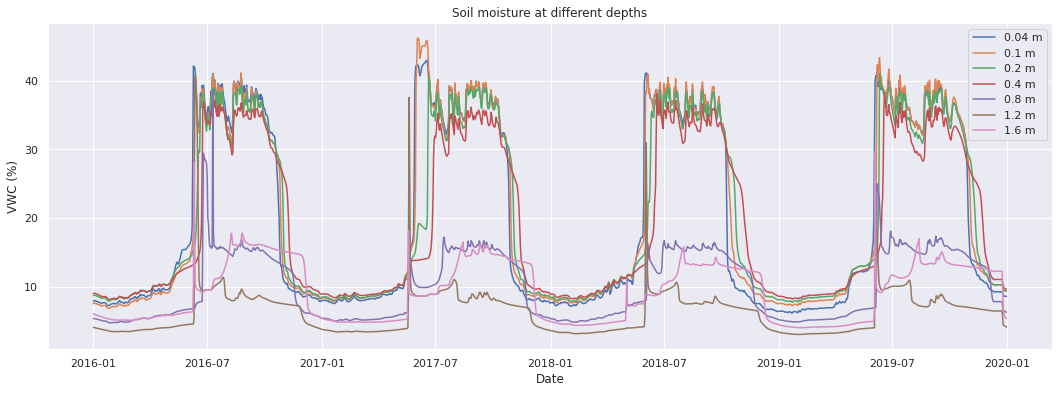

In [112]:
plt.figure(figsize=(18,6))
plt.title('Soil moisture at different depths')
plt.plot(data_AWS_output['Soil moisture at - 0.04 m (%)'], label='0.04 m')
plt.plot(data_AWS_output['Soil moisture at - 0.1 m (%)'], label='0.1 m')
plt.plot(data_AWS_output['Soil moisture at - 0.2 m (%)'], label='0.2 m')
plt.plot(data_AWS_output['Soil moisture at - 0.4 m (%)'], label='0.4 m')
plt.plot(data_AWS_output['Soil moisture at - 0.8 m (%)'], label='0.8 m')
plt.plot(data_AWS_output['Soil moisture at - 1.2 m (%)'], label='1.2 m')
plt.plot(data_AWS_output['Soil moisture at - 1.6 m (%)'], label='1.6 m')


plt.ylabel('VWC (%)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date')
plt.legend()
plt.grid(True)

Comments:
1. Soil moisture decreases with depth - Good!
2. Soil moisture sensors at 0.04 m, 0.1 m, 0.2 m & 0.4 m have similar moisture contents [during the monsoon period] and also higher soil moisture content than at 0.8 m, 1.2 m and 1.6 m. 
3. There seems to be a grouping of soil moisture sensors at 0.04 m, 0.1 m, 0.2 m & 0.4 m  & 0.8 m, 1.2 m and 1.6 m - There probably exist two different layers of soil? - Similar pattern seen at up-slope, middle-slope and riparian zone.
4. Soil moisture content increases during the indian summer monsoons [2019-06 to 2019-11] - Plot it with precipitation?
5. How to identify if soil is frozen? - Seems to be a constant moisture content during the winter period.
6. On observing the yearly trend, the soil moisture content values have more or less similar trends.

### Plotting soil temperature at different depths

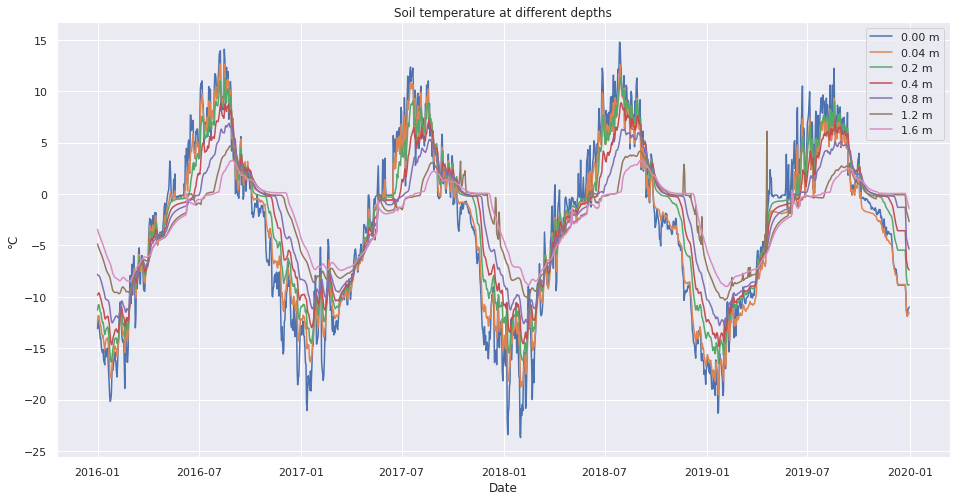

In [113]:
plt.figure(figsize=(16,8))
plt.title('Soil temperature at different depths')
#plt.plot(data_AWS_syn['Air temperature at 5 m (°C)'], label='Air temperature at 5 m')
plt.plot(data_AWS_output['Soil temperature at - 0.00 m (°C)'], label='0.00 m')
plt.plot(data_AWS_output['Soil temperature at - 0.04 m (°C)'], label='0.04 m')
plt.plot(data_AWS_output['Soil temperature at - 0.2 m (°C)'], label='0.2 m')
plt.plot(data_AWS_output['Soil temperature at - 0.4 m (°C)'], label='0.4 m')
plt.plot(data_AWS_output['Soil temperature at - 0.8 m (°C)'], label='0.8 m')
plt.plot(data_AWS_output['Soil temperature at - 1.2 m (°C)'], label='1.2 m')
plt.plot(data_AWS_output['Soil temperature at - 1.6 m (°C)'], label='1.6 m')
plt.ylabel('°C')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('°Cm-°Cd'))
plt.xlabel('Date')
plt.legend()
plt.grid(True)

Comments:
1. In the winter the surface is cooler than the subsurface (soil at greater depths) & in the summer, the subsurface is cooler than the surface - Good! 
2. The temperature values increases during the summer and decreases during the winter good!
3. The variations of subsurface temperature decreases with depth.
4. On observing the yearly trend, the temperature variations along different depths seem to be similar.

### Dealing with Erroneous and missing data data:

In [114]:
data_AWS_output.index[np.where(np.isnan(data_AWS_output))[0]]

DatetimeIndex([], dtype='datetime64[ns]', name='TIMESTAMP', freq=None)

### No missing or erroneous values??!!

In [115]:
data_AWS_output_calib = data_AWS_output.loc['2016':'2018']
data_AWS_output_validate = data_AWS_output.loc['2019']

#### Storing the data in a csv file for calibration (pest)

In [116]:
data_AWS_output_calib.to_csv('Final_OutputData_4yrs/Calib_outputdata_2016_2018.csv', sep='\t')
data_AWS_output_validate.to_csv('Final_OutputData_4yrs/Validate_outputdata_2019.csv', sep='\t')